**Diabetes prediction Using Machine Learing**

In [1]:
#import the Libraies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Load Dataset**

In [2]:
df=pd.read_csv("diabetes.csv")

**EDA**

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
#Replace the '0' to np.nan
df.columns
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']]=df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']].replace(0,np.nan)

In [10]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

**Visualization**

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

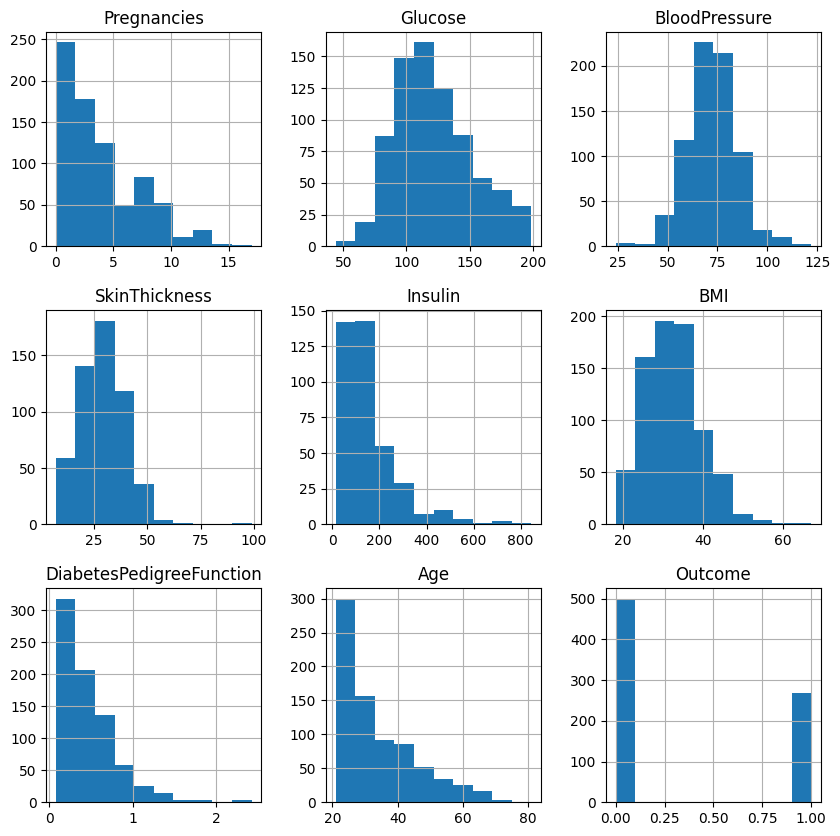

In [11]:
df.hist(figsize=(10,10))

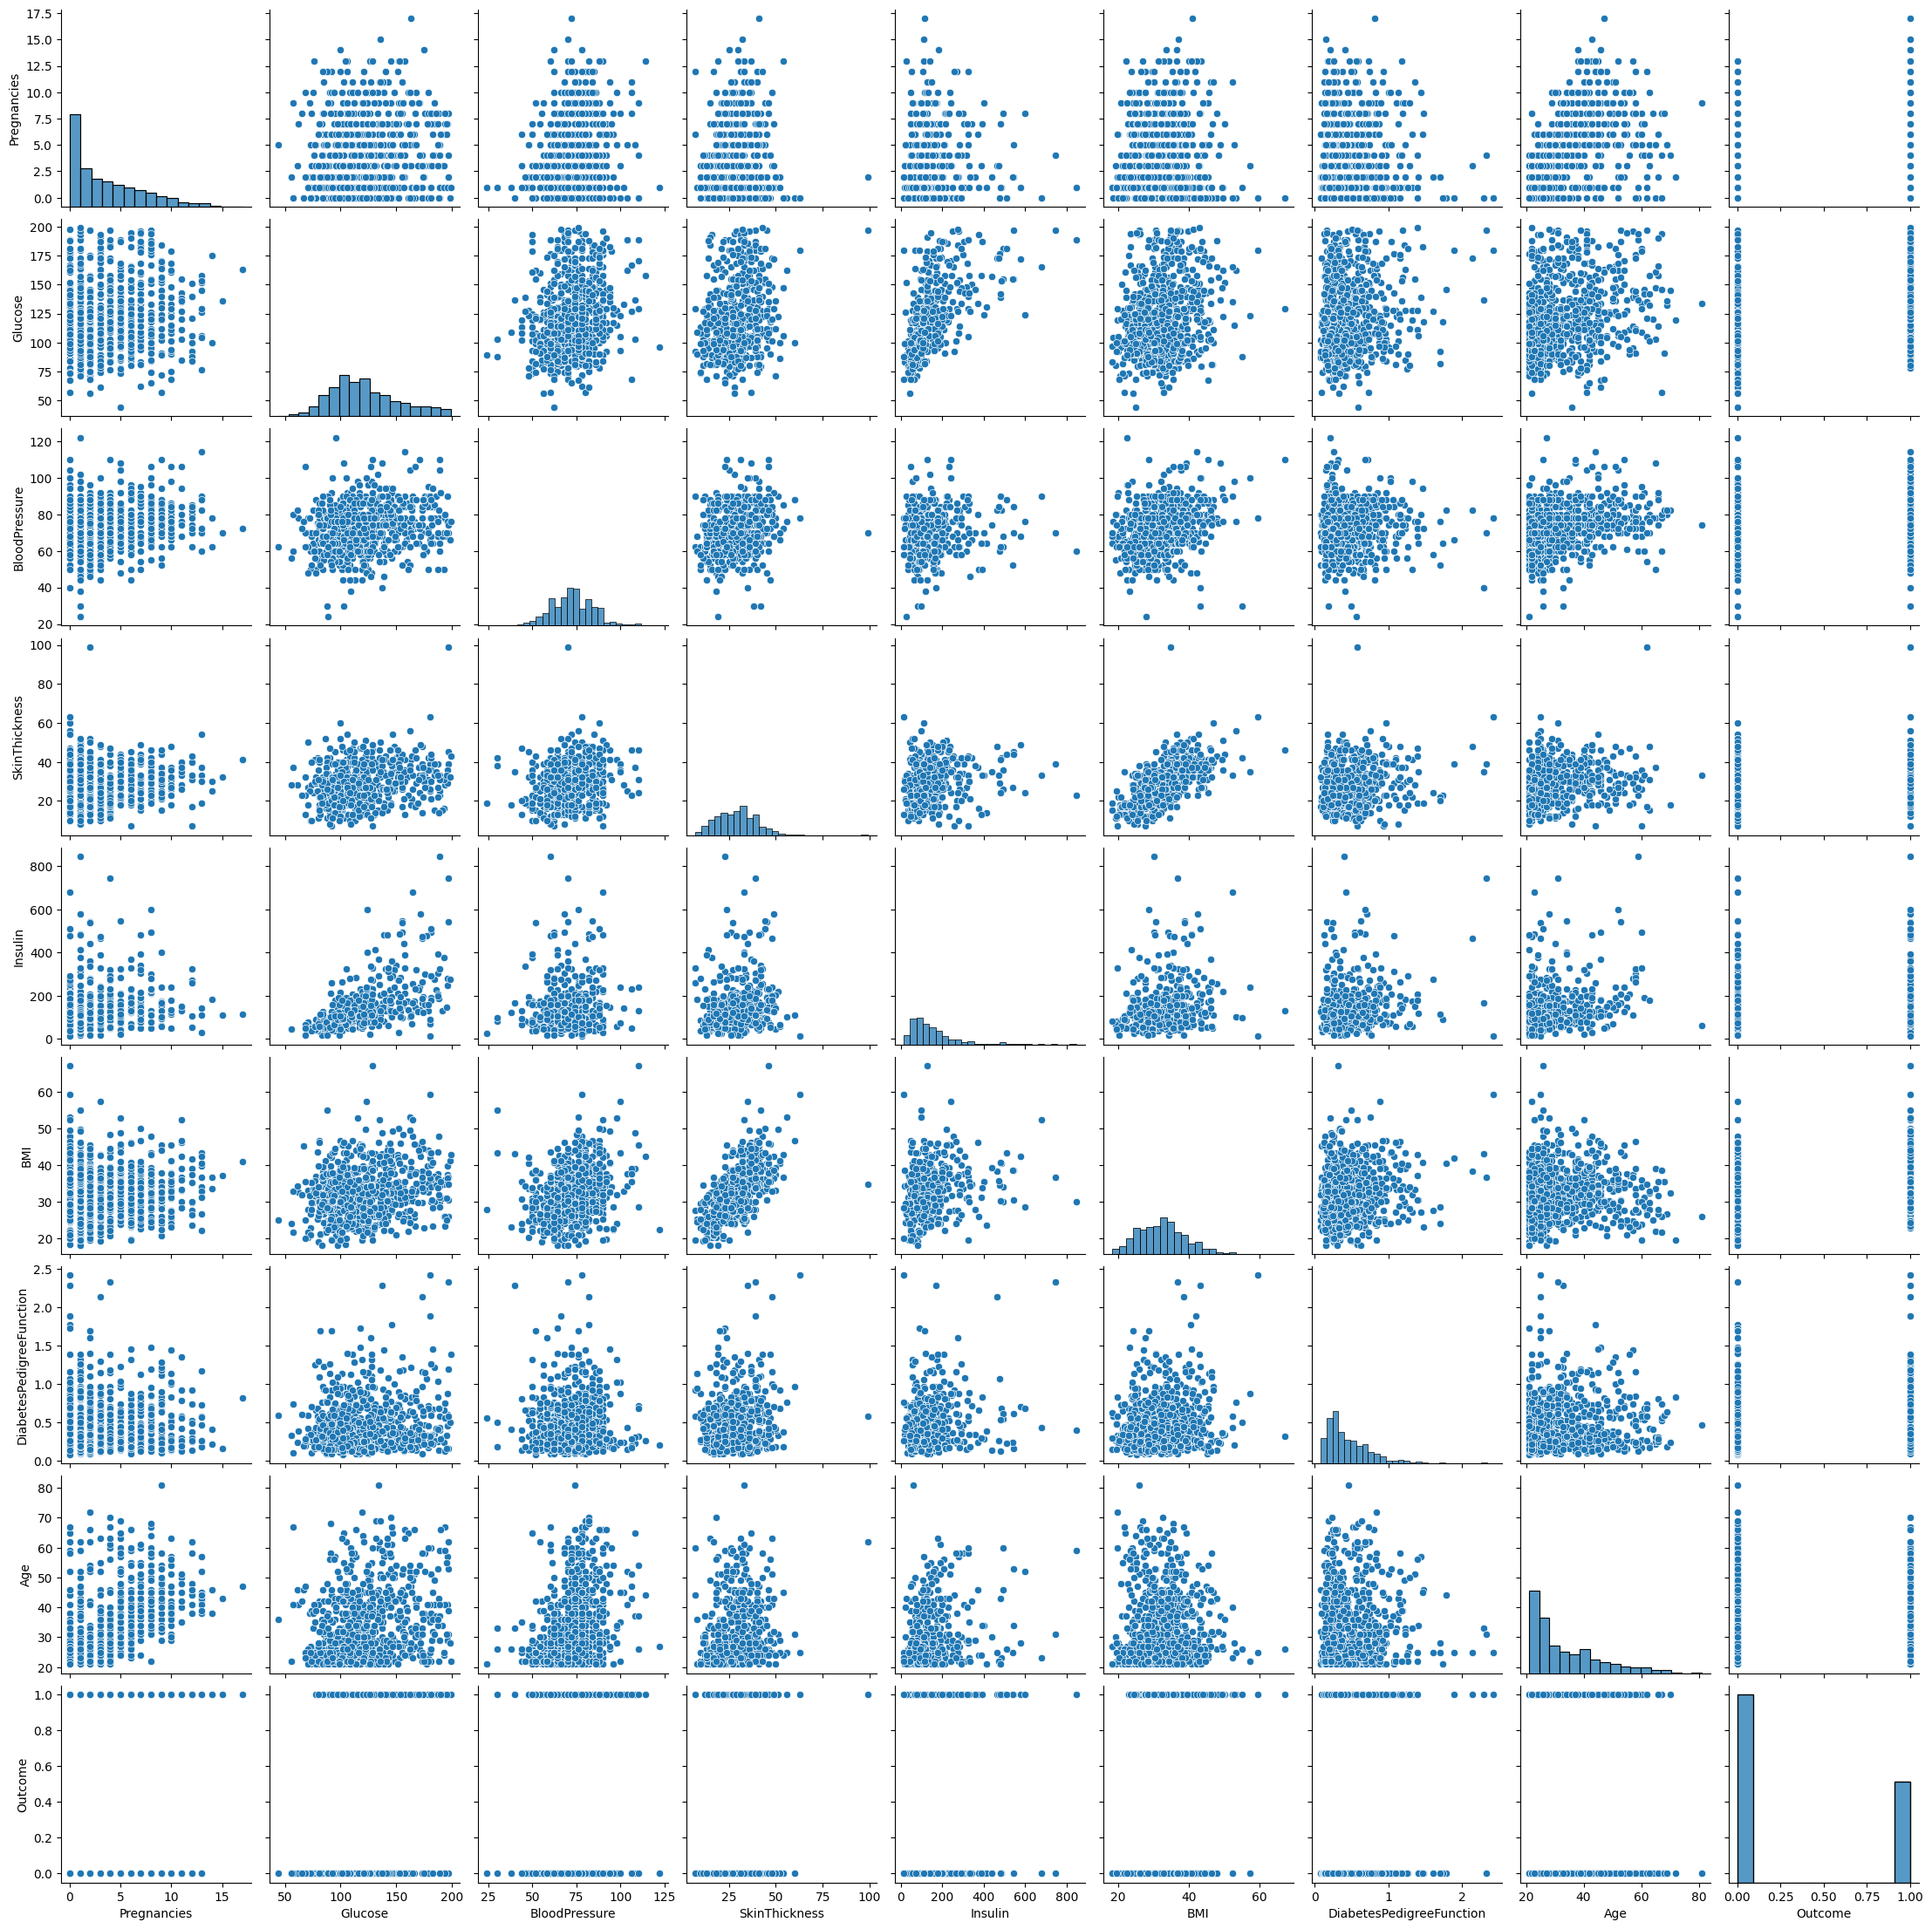

In [12]:
sns.pairplot(df)

<Axes: >

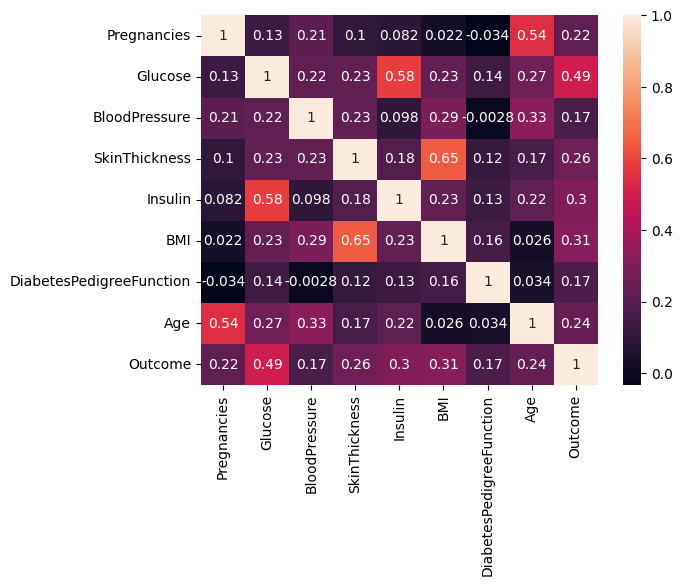

In [13]:
sns.heatmap(df.corr(),annot=True)

**Split Data**

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [16]:
x=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]

In [17]:
y=df['Outcome']

In [18]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.29,random_state=42)

In [19]:
X_train.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                21
SkinThickness               157
Insulin                     264
BMI                           5
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [20]:
X_test.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                14
SkinThickness                70
Insulin                     110
BMI                           6
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

**Managing Missing values**

In [21]:
X_train.loc[:,'Glucose']

449    120.0
762     89.0
703    129.0
619    119.0
198    109.0
       ...  
71     139.0
106     96.0
270    101.0
435    141.0
102    125.0
Name: Glucose, Length: 545, dtype: float64

In [22]:
#Handling X_train missing values

Glucose_mean_Xtrain=X_train.loc[:,'Glucose'].mean()
Glucose_mean_Xtrain
BloodPressure_mean_Xtrain=X_train.loc[:,'BloodPressure'].mean()
BloodPressure_mean_Xtrain

np.float64(72.2385496183206)

In [23]:
SkinThickness_medianXtrain=X_train.loc[:,'SkinThickness'].median()
Insulin_median_Xtrain=X_train.loc[:,'Insulin'].median()
BMI_median_Xtrain=X_train.loc[:,'BMI'].median()


In [24]:
X_train.loc[:,"Glucose"]=X_train.loc[:,"Glucose"].fillna(Glucose_mean_Xtrain)
X_train.loc[:,'BloodPressure']=X_train.loc[:,"Glucose"].fillna(BloodPressure_mean_Xtrain)
X_train.loc[:,'SkinThickness']=X_train.loc[:,"Glucose"].fillna(SkinThickness_medianXtrain)
X_train.loc[:,'Insulin']=X_train.loc[:,"Glucose"].fillna(Insulin_median_Xtrain)
X_train.loc[:,'BMI']=X_train.loc[:,"Glucose"].fillna(BMI_median_Xtrain)

In [25]:
X_train.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [26]:
#HAndle X_test missing values
X_test.loc[:,"Glucose"]=X_test.loc[:,"Glucose"].fillna(Glucose_mean_Xtrain)
X_test.loc[:,'BloodPressure']=X_test.loc[:,"Glucose"].fillna(BloodPressure_mean_Xtrain)
X_test.loc[:,'SkinThickness']=X_test.loc[:,"Glucose"].fillna(SkinThickness_medianXtrain)
X_test.loc[:,'Insulin']=X_test.loc[:,"Glucose"].fillna(Insulin_median_Xtrain)
X_test.loc[:,'BMI']=X_test.loc[:,"Glucose"].fillna(BMI_median_Xtrain)

In [27]:
X_test.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [28]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
449,0,120.0,120.0,120.0,120.0,120.0,0.285,26
762,9,89.0,89.0,89.0,89.0,89.0,0.142,33
703,2,129.0,129.0,129.0,129.0,129.0,0.304,41
619,0,119.0,119.0,119.0,119.0,119.0,0.141,24
198,4,109.0,109.0,109.0,109.0,109.0,0.905,26
...,...,...,...,...,...,...,...,...
71,5,139.0,139.0,139.0,139.0,139.0,0.411,26
106,1,96.0,96.0,96.0,96.0,96.0,0.207,27
270,10,101.0,101.0,101.0,101.0,101.0,1.136,38
435,0,141.0,141.0,141.0,141.0,141.0,0.205,29


**Normalization**

In [29]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()

In [30]:
X_train=scalar.fit_transform(X_train)

In [31]:
X_train

array([[0.        , 0.49032258, 0.49032258, ..., 0.49032258, 0.08838599,
        0.08333333],
       [0.52941176, 0.29032258, 0.29032258, ..., 0.29032258, 0.02732707,
        0.2       ],
       [0.11764706, 0.5483871 , 0.5483871 , ..., 0.5483871 , 0.09649872,
        0.33333333],
       ...,
       [0.58823529, 0.36774194, 0.36774194, ..., 0.36774194, 0.45175064,
        0.28333333],
       [0.        , 0.62580645, 0.62580645, ..., 0.62580645, 0.05422716,
        0.13333333],
       [0.        , 0.52258065, 0.52258065, ..., 0.52258065, 0.07856533,
        0.        ]])

In [32]:
X_test=scalar.fit_transform(X_test)

In [33]:
X_test

array([[0.46153846, 0.27205882, 0.27205882, ..., 0.27205882, 0.22619048,
        0.47826087],
       [0.15384615, 0.375     , 0.375     , ..., 0.375     , 0.03968254,
        0.        ],
       [0.15384615, 0.34558824, 0.34558824, ..., 0.34558824, 0.0462963 ,
        0.        ],
       ...,
       [0.23076923, 0.80882353, 0.80882353, ..., 0.80882353, 0.0734127 ,
        0.06521739],
       [0.53846154, 0.16176471, 0.16176471, ..., 0.16176471, 0.44907407,
        0.32608696],
       [0.07692308, 0.29411765, 0.29411765, ..., 0.29411765, 0.28968254,
        0.10869565]])

**Model Building**

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
knn_model=KNeighborsClassifier(10)

In [36]:
knn_model=knn_model.fit(X_train,y_train)
print(X_train.shape)

(545, 8)


In [37]:
y_predict=knn_model.predict(X_test)

**Model Evaluation**

In [38]:
from sklearn.metrics import accuracy_score,classification_report

In [39]:
accuracy_score(y_test,y_predict)

0.7623318385650224

In [40]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       145
           1       0.71      0.54      0.61        78

    accuracy                           0.76       223
   macro avg       0.75      0.71      0.72       223
weighted avg       0.76      0.76      0.75       223



**Predict on a unknown person features**

In [41]:
knn_model.predict(np.array([[9,89.0,89.0,89.0,89.0,89.0,0.142,33]]))

array([1])

In [61]:
import pickle

# Train your model
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)  # X_train should be shape (n, 8)

# Save the model
with open("knn_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [58]:
import pickle
from sklearn.neighbors import KNeighborsClassifier

# Example training setup (replace with your actual training code)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Save the trained model
with open("knn_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [59]:
import pickle
from sklearn.neighbors import KNeighborsClassifier

# Example training setup (replace with your actual training code)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Save the trained model
with open("knn_model.pkl", "wb") as f:
    pickle.dump(model, f)